# Часть 2. Задача классификации

Датасет: https://www.kaggle.com/competitions/titanic

Задачи:

А. Решение задачи классификации
1. Построить модель линейной классификации. При решении задачи методом
градиентного спуска, необходимо вычислить градиент с помощью матрицы
признаков.
2. Построить модель на основе случайного леса классифицирующих деревьев. Определить параметры классификатора (количество деревьев, максимальная
глубина дерева), при которых точность классификации максимальна.

Б. Анализ ROC/PR-кривых
1. Рассмотреть простейшую задачу двухклассовой классификации, в которой
элементы выборки имеют нормальное распределение с дисперсией 1 и
средними значениями +μ для экземпляров одного класса и -μ для экземпляров другого класса. Экземпляры каждого класса появляются в обучающей выборке с вероятностью 1⁄2. Для данной задачи необходимо определить оптимальный
классификатор, а также построить ROC-кривую для различных значений μ.
2. Для двух моделей, полученных в п.А., построить ROC и PR (precision-recall) кривые. Получить значения площадей под этими кривыми. Какая метрика (ROC-AUC или PR-AUC) является более предпочтительной в данном примере и
почему?

Задание выполнил: Никита Пархоменко

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Смысл признаков:**

Survived:	Survival	(0 = No, 1 = Yes)

Pclass:	Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)

Name: Name

Sex:	Sex

Age:	Age in years

Sibsp:	# of siblings / spouses aboard the Titanic

Parch:	# of parents / children aboard the Titanic

Ticket:	Ticket number

Fare:	Passenger fare

Cabin:	Cabin number

Embarked:	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

---

Task: **Classification**

Target: **Survived**

## Решение

In [ ]:
df = pd.read_csv('gdrive/My Drive/ml_task_hse/task2_data/train.csv', sep=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Уберем малоинформативные колонки (обойдемся без сложного FE)
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
target = 'Survived'
features = sorted(list(set(set(df.columns) - set([target]))))

numerical_features = sorted(['Age', 'SibSp', 'Parch', 'Fare'])
categorical_features = sorted(list(set(set(features) - set(numerical_features))))

In [ ]:
print(f'Target: {target}')
print(f'Features: {features}\n')
print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Target: Survived
Features: ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']

Numerical features: ['Age', 'Fare', 'Parch', 'SibSp']
Categorical features: ['Embarked', 'Pclass', 'Sex']


In [ ]:
print("Number of unique categories\n")

for feature in categorical_features:
  print(f"{feature}: {df[feature].nunique()}")

Number of unique categories

Embarked: 3
Pclass: 3
Sex: 2


In [ ]:
for feature in features:
  nan_values = df[df[feature].isna()].count()[0]
  if nan_values > 0:
    print(f"{feature}: {nan_values} NaN values")

Age: 177 NaN values
Embarked: 2 NaN values


In [ ]:
# Fix NaN values

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### Сделаем пайплайн подготовки данных для решения задачи.

Отметим, что для обработки категориальных фичей в рамках линейной регрессии полезно сделать из одной категориальной фичи N бинарных фичей, где N - количество категорий.

Так мы и сделаем.

In [ ]:
from typing import List

def preprocess_data(df: pd.DataFrame, target: str, features: List, categorical_features: List):
  X, y = df[[*features]], df[target]
  X = pd.get_dummies(X, columns=categorical_features)
  final_features = list(X.columns)
  return X, y, final_features

In [ ]:
X, y, final_features = preprocess_data(df, target, features, categorical_features)
X

,Age,Fare,Parch,SibSp,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.000000,7.2500,0,1,0,0,1,0,0,1,0,1
1,38.000000,71.2833,0,1,1,0,0,1,0,0,1,0
2,26.000000,7.9250,0,0,0,0,1,0,0,1,1,0
3,35.000000,53.1000,0,1,0,0,1,1,0,0,1,0
4,35.000000,8.0500,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,0,0,0,1,0,1,0,0,1
887,19.000000,30.0000,0,0,0,0,1,1,0,0,1,0
888,29.699118,23.4500,2,1,0,0,1,0,0,1,1,0
889,26.000000,30.0000,0,0,1,0,0,1,0,0,0,1


In [ ]:
print(*final_features, sep=', ')

Age, Fare, Parch, SibSp, Embarked_C, Embarked_Q, Embarked_S, Pclass_1, Pclass_2, Pclass_3, Sex_female, Sex_male


In [ ]:
from sklearn.preprocessing import StandardScaler

# Train/test split, data scaling
def train_data_pipeline(df: pd.DataFrame,
                       target: str,
                       features: List,
                       categorical_features: List,
                       test_size: float = 0.3,
                       random_state: int = 42):

  X, y, _ = preprocess_data(df, target, features, categorical_features)
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=random_state)
  y_train= y_train.values.reshape(-1,1)
  y_test= y_test.values.reshape(-1,1)

  # Scaling the data
  X_scaler = StandardScaler()
  X_train = X_scaler.fit_transform(X_train)
  X_test = X_scaler.transform(X_test)
  return X_train, X_test, y_train, y_test

## A. Решение задачи классификации

### 1. Построить модель линейной классификации. При решении задачи методом градиентного спуска, необходимо вычислить градиент с помощью матрицы признаков.

В качестве модели линейной классификации выберем логистическую регрессию. Сначала обучим реализацию sklearn, а потом - собственную реализацию (формула градиента приведена в коде, функция grad_log_loss).

In [ ]:
X_train, X_test, y_train, y_test = train_data_pipeline(df, target, features, categorical_features)

In [ ]:
# Сначала попробуем обучить реализацию логистической регрессии из sklearn - для примера

from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.71      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [ ]:
clf.coef_, clf.intercept_

(array([[-0.41217161,  0.1929194 , -0.09254716, -0.3160219 ,  0.12737292,
          0.05199058, -0.14349469,  0.33539669,  0.18577615, -0.43479549,
          0.61482557, -0.61482557]]),
 array([-0.71665428]))

In [ ]:
# Код класса логистической регрессии моего авторства

class LogRegression():
    def __init__(self, w=[], eta=1, eps=1e-6, max_iter=1e2, t=0.5):
        self.intercept = 0
        self.w = np.array(w)
        self.eta = eta
        self.eps = eps
        self.max_iter = max_iter
        self.t = t

    def reset(self, X):
        self.intercept = 0
        self.w = np.zeros(X.shape[1])

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.intercept)

    def predict(self, X):
        return np.array(list(map(int, logreg.predict_proba(X) > self.t)))

    def log_loss(self, X, y):
        p = self.sigmoid(np.dot(X, self.w) + self.intercept)
        l = X.shape[0]
        return - (1 / l) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

    def grad_log_loss(self, X, y):
        p = self.sigmoid(np.dot(X, self.w))
        l = X.shape[0]
        grad = (1 / l) * np.dot(X.T, (p - y))
        return grad

    def fit(self, X, y):
        X = np.array(X)
        intercept_col = np.ones((len(X), 1))
        X = np.hstack((X, intercept_col))
        y = np.array(y).reshape(-1)
        self.w = np.zeros(X.shape[1])
        weight_dist = np.inf
        iter_num = 0
        while (weight_dist > self.eps) and (iter_num < self.max_iter):
            w_new = self.w - self.eta * self.grad_log_loss(X, y)
            weight_dist = np.linalg.norm(w_new - self.w)
            iter_num += 1
            self.w = w_new
        self.intercept = self.w[-1]
        self.w = self.w[:-1]

In [ ]:
logreg = LogRegression()
logreg.fit(X_train, y_train)

y_test_pred = logreg.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.71      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [ ]:
logreg.w, logreg.intercept

(array([-0.42158734,  0.19455176, -0.09474018, -0.3240937 ,  0.12730623,
         0.05299429, -0.14408241,  0.3400988 ,  0.18723795, -0.43994923,
         0.61970859, -0.61970859]),
 -0.7193148361768414)

Как видим, метрики и веса реализации sklearn и моей собственной реализации логистической регрессии практически идентичны.

### 2. Построить модель на основе случайного леса классифицирующих деревьев. Определить параметры классификатора (количество деревьев, максимальная глубина дерева), при которых точность классификации максимальна.

Воспользуемся реализация RandomForestClassifier от sklearn (опустим самостоятельную реализацию алгоритма), организуем при этом перебор гиперпараметров классификатора.

Поскольку для алгоритмов, основанных на деревьях, не обязательна стандартизация численных признаков, а также не очень эффективен подход One Hot Encoding при обработке категориальных признаков, перепишем пайплайн подготовки данных с использованием LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Train/test split, label encoding for RandomForestClassifier
def rfc_train_data_pipeline(df: pd.DataFrame,
                       target: str,
                       features: List,
                       categorical_features: List,
                       test_size: float = 0.3,
                       random_state: int = 42):

  X, y = df[[*features]], df[target]

  le = LabelEncoder()
  X = X.apply(le.fit_transform)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=random_state)

  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = rfc_train_data_pipeline(df, target, features, categorical_features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50*i for i in range(1,11)],
    'max_depth': [i for i in range(1,11)]
}

clf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(clf, param_grid, scoring='accuracy')
clf.fit(X_train, y_train)
clf = clf.best_estimator_

y_test_pred = clf.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
clf

RandomForestClassifier(max_depth=4, n_estimators=250, random_state=42)

Таким образом, качество лучшей версии модели случайного леса классификаторов примерно такое же, как у модели логистической регрессии (линейный классификатор).

## Б. Анализ ROC/PR-кривых

### 1. Для двух моделей, полученных в п.А., построить ROC и PR (precision-recall) кривые. Получить значения площадей под этими кривыми. Какая метрика (ROC-AUC или PR-AUC) является более предпочтительной в данном примере и почему?

In [ ]:
y_test_proba = {'LogRegression': [], 'RandomForestClassifier': []}
roc_auc = {'LogRegression': 0.0, 'RandomForestClassifier': 0.0}
pr_auc = {'LogRegression': 0.0, 'RandomForestClassifier': 0.0}

#### RandomForestClassifier

##### ROC-AUC

In [ ]:
y_test_proba['RandomForestClassifier'] = clf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc['RandomForestClassifier'] = roc_auc_score(y_test, y_test_proba['RandomForestClassifier'])
print('ROC-AUC:', roc_auc['RandomForestClassifier'])

ROC-AUC: 0.878837436162277


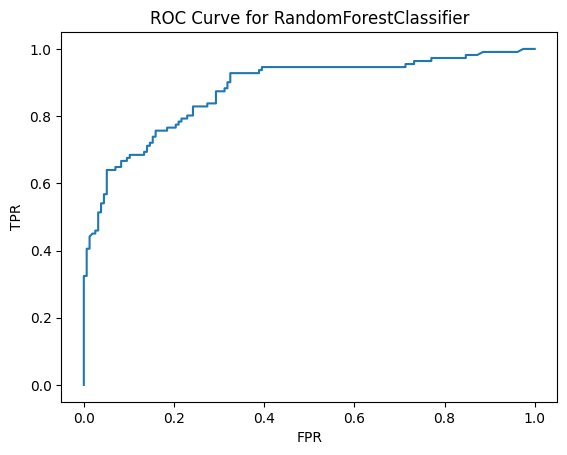

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba['RandomForestClassifier'])
plt.plot(fpr, tpr)
plt.title('ROC Curve for RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##### PR-AUC

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba['RandomForestClassifier'])
pr_auc['RandomForestClassifier'] = auc(recall, precision)

print('PR-AUC:', pr_auc['RandomForestClassifier'])

PR-AUC: 0.8656284468654151


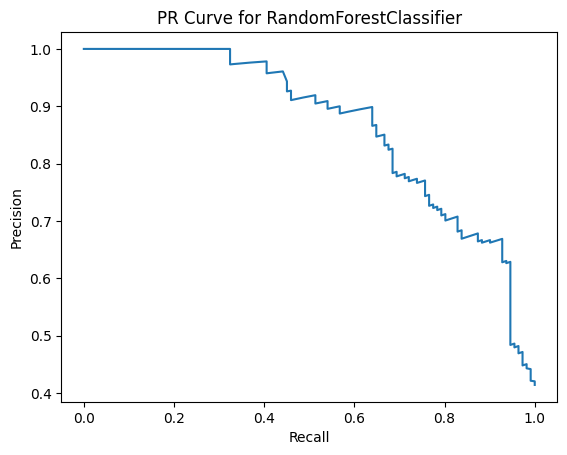

In [ ]:
plt.plot(recall, precision)
plt.title('PR Curve for RandomForestClassifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

#### LogRegression

##### ROC-AUC

In [ ]:
X_train, X_test, y_train, y_test = train_data_pipeline(df, target, features, categorical_features)

y_test_proba['LogRegression'] = logreg.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc['LogRegression'] = roc_auc_score(y_test, y_test_proba['LogRegression'])
print('ROC-AUC:', roc_auc['LogRegression'])

ROC-AUC: 0.8727836116371148


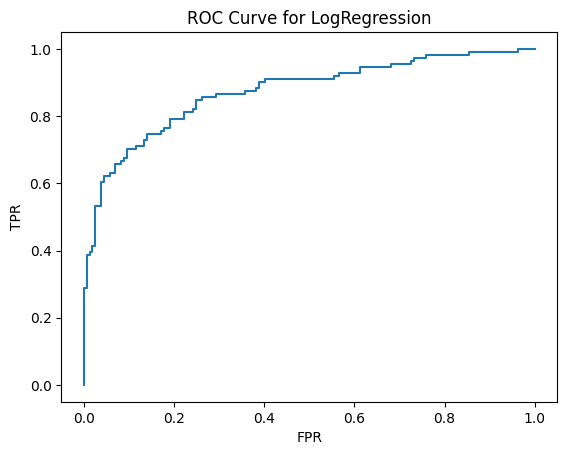

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba['LogRegression'])
plt.plot(fpr, tpr)
plt.title('ROC Curve for LogRegression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##### PR-AUC

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba['LogRegression'])
pr_auc['LogRegression'] = auc(recall, precision)

print('PR-AUC:', pr_auc['LogRegression'])

PR-AUC: 0.862891768037606


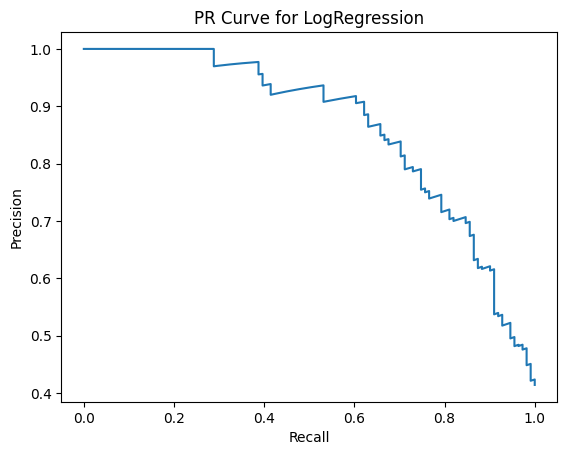

In [ ]:
plt.plot(recall, precision)
plt.title('PR Curve for LogRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Посмотрим метрики вместе

In [ ]:
roc_auc

{'LogRegression': 0.8727836116371148,
 'RandomForestClassifier': 0.878837436162277}

In [ ]:
pr_auc

{'LogRegression': 0.862891768037606,
 'RandomForestClassifier': 0.8656284468654151}

В обоих случаях случайный лес показывает чуть более высокое качество, чем линейный классификатор (логистическая регрессия).

**ROC AUC**

Метрика ROC AUC при этом показывает, насколько качественно мы можем ранжировать объекты по классам, исходя из их вероятностных меток (т. е. насколько хорошо модель может ранжировать предсказания). Можно считать, что ROC AUC - вероятность того, что случайно выбранный объект класса 1 получит оценку вероятности класса 1 более высокую, чем случайно выбранный объект класса 0.

Метрику ROC AUC не стоит использовать, если имеется очень сильный дисбаланс классов. Это не наш случай.

При этом, метрику ROC AUC стоит использовать, если нам одинаково важны оба класса.

**PR AUC**

Метрику PR AUC стоит использовать, когда отсутствует сильный дисбаланс классов, а также, когда нам более важны объекты класса 1, чем объекты класса 0.


Исходя из вышесказанного, более предпочтительной в данном случае является метрика **ROC AUC**. Классы в задаче довольно хорошо сбалансированы (см. ниже).

In [ ]:
y.mean()

0.3838383838383838

In [ ]:
y.unique()

array([0, 1])

### 2. Рассмотреть простейшую задачу двухклассовой классификации, в которой элементы выборки имеют нормальное распределение с дисперсией 1 и средними значениями +μ для экземпляров одного класса и -μ для экземпляров другого класса. Экземпляры каждого класса появляются в обучающей выборке с вероятностью 1⁄2. Для данной задачи необходимо определить оптимальный классификатор, а также построить ROC-кривую для различных значений μ.

Формализуем условия задачи:

- Имеются объекты двух классов: 0 и 1
- Объекты каждого класса с одинаковой вероятностью появляются в выборке (классы идеально сбалансированы, объектов каждого класса одинаковое количество)
- Каждый объект имеет ровно 1 признак, этот признак имеет нормальное распределение с дисперсией 1 и средним значением +μ для класса 1 и -μ для класса 0

Что нужно сделать:

- Определить оптимальный классификатор
- Построить ROC-кривую для различных значений μ

### Решение:

На ум приходит метод опорных векторов (Support Vector Machine, SVM), т. е. линейный классификатор с L2-регуляризацией и кусочно-линейной функцией потерь (Hinge Loss). При этом отсутствует функция активации, решение о классе принимается по знаку скалярного произведения признаков и весов.

Опустим теоретические выкладки о том, как именно работает данный алгоритм (важно то, что он стремится разделить объекты разных классов с учетом отступа, есть случаи линейной разделимости и линейной неразделимости), и построим классификатор и ROC-кривые.

Для построения ROC-кривых нужно уметь получать оценки вероятностей принадлежности к классам. Это возможно, пусть и несколько осложнено в случае SVM (Platt scaling). Альтернативный вариант - использовать вывод decision_function.

Мы воспользуемся получением оценок вероятностей с Platt scaling.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.utils import shuffle

In [ ]:
# Пример датасета (с mu = +- 5, sigma = 1)

mu, sigma = 5, 1
sample_size = 1000
sample_pos = pd.DataFrame()
sample_neg = pd.DataFrame()

sample_pos['feature'] = np.random.normal(mu, sigma, int(sample_size / 2))
sample_pos['target'] = 1

sample_neg['feature'] = np.random.normal(-mu, sigma, int(sample_size / 2))
sample_neg['target'] = 0

sample = pd.concat([sample_pos, sample_neg]).reset_index(drop=True)
sample = shuffle(sample, random_state=42).reset_index(drop=True)
sample

,feature,target
0,-3.925187,0
1,-4.639812,0
2,-3.808325,0
3,-4.466802,0
4,5.611922,1
...,...,...
995,5.296355,1
996,3.970739,1
997,-7.630666,0
998,5.065347,1


In [ ]:
# Решение задачи при разных mu

def svc_solver(mu, sigma, sample_size, test_size=0.3):
  # Подготовка датасета
  sample_pos = pd.DataFrame()
  sample_neg = pd.DataFrame()

  sample_pos['feature'] = np.random.normal(mu, sigma, int(sample_size / 2))
  sample_pos['target'] = 1

  sample_neg['feature'] = np.random.normal(-mu, sigma, int(sample_size / 2))
  sample_neg['target'] = 0

  sample = pd.concat([sample_pos, sample_neg]).reset_index(drop=True)
  sample = shuffle(sample, random_state=42).reset_index(drop=True)
  X, y = np.array(sample['feature']), np.array(sample['target'])
  X = X.reshape(-1,1)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=42)

  # Построение оптимального классификатора
  clf = SVC(kernel='linear', probability=True, random_state=42)
  clf.fit(X, y)
  y_test_proba = clf.predict_proba(X_test)[:,1]
  roc_auc = round(roc_auc_score(y_test, y_test_proba), 3)
  fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
  plt.plot(fpr, tpr)
  plt.title(f'ROC Curve for SVC (mu = {mu}), ROC-AUC = {roc_auc}')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()

Ниже приведем примеры ROC-кривых и метрик ROC-AUC при разных μ.

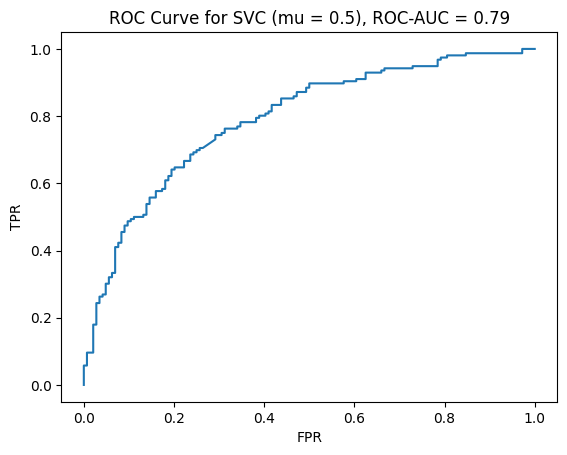

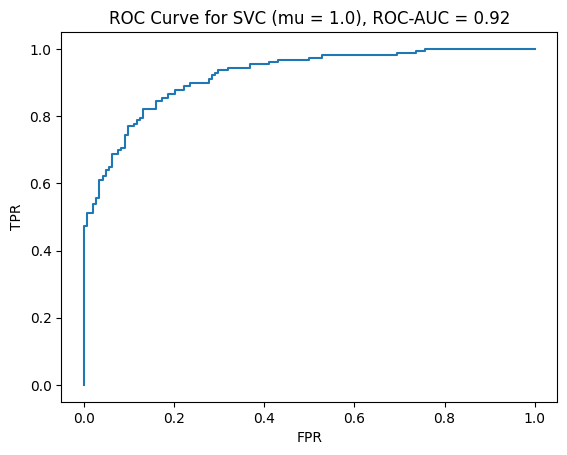

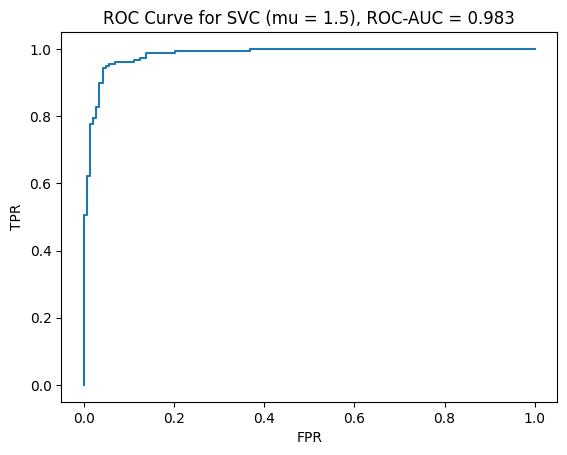

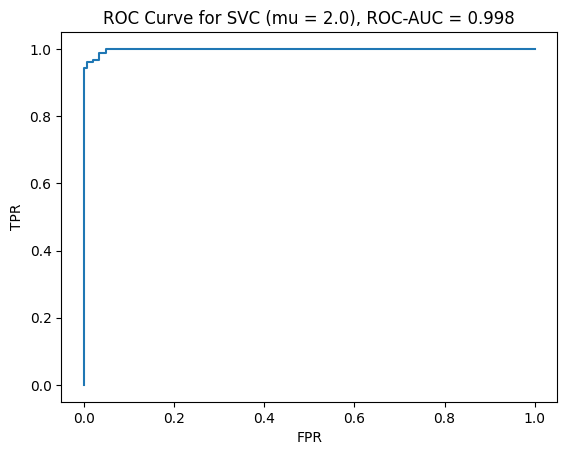

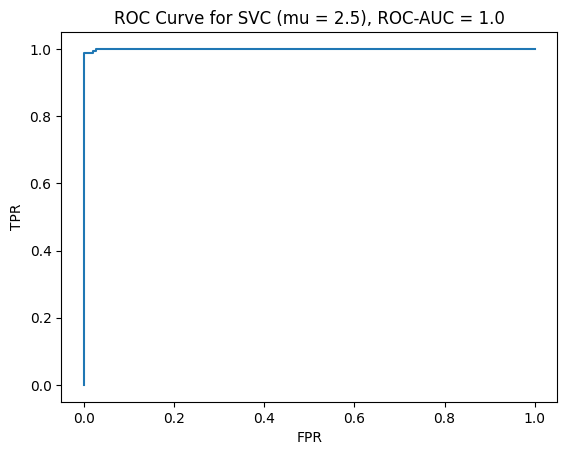

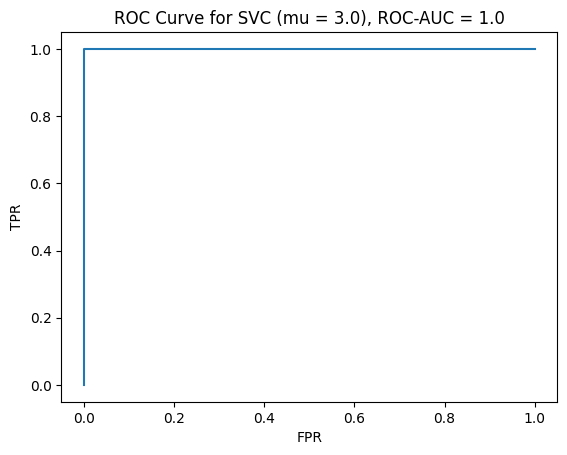

In [ ]:
for mu in [0.5*i for i in range(1, 7)]:
  svc_solver(mu=mu, sigma=1, sample_size=1000)

Приведенные выше результаты показывают, что линейный классификатор, основанный на методе опорных векторов (SVM), действительно является оптимальным для данной постановки задачи, и с увеличением μ ROC-AUC стремится к 1, ситуация в таком случае становится все ближе к случаю линейной разделимости выборки.